# Interactive single Izhikevich neuron NeuroML example

In [1]:
from neuroml import NeuroMLDocument
from neuroml import Izhikevich2007Cell
from neuroml import Population
from neuroml import Network
from neuroml import PulseGenerator
from neuroml import ExplicitInput
import neuroml.writers as writers
from neuroml.utils import validate_neuroml2
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation
import numpy as np

## Declaring the NeuroML model

### Create a NeuroML document

In [2]:
nml_doc = NeuroMLDocument(id="IzSingleNeuron")

### Define the Izhikevich cell and add it to the model

In [3]:
iz0 = Izhikevich2007Cell(
    id="iz2007RS0", v0="-60mV", C="100pF", k="0.7nS_per_mV", vr="-60mV",
    vt="-40mV", vpeak="35mV", a="0.03per_ms", b="-2nS", c="-50.0mV", d="100pA")
nml_doc.izhikevich2007_cells.append(iz0)

### Create a network and add it to the model

In [4]:
net = Network(id="IzNet")
nml_doc.networks.append(net)

### Create a population of defined cells and add it to the model

In [5]:
size0 = 1
pop0 = Population(id="IzPop0", component=iz0.id, size=size0)
net.populations.append(pop0)

### Define an external stimulus and add it to the model

In [6]:
pg = PulseGenerator(
    id="pulseGen_%i" % 0, delay="0ms", duration="1000ms",
    amplitude="0.07 nA"
)
nml_doc.pulse_generators.append(pg)
exp_input = ExplicitInput(target="%s[%i]" % (pop0.id, 0), input=pg.id)
net.explicit_inputs.append(exp_input)

### Write the NeuroML model to a file

In [7]:
nml_file = 'izhikevich2007_single_cell_network.nml'
writers.NeuroMLWriter.write(nml_doc, nml_file)
print("Written network file to: " + nml_file)

Written network file to: izhikevich2007_single_cell_network.nml


### Validate the NeuroML model

In [8]:
validate_neuroml2(nml_file)

Validating izhikevich2007_single_cell_network.nml against /usr/lib/python3.9/site-packages/neuroml/nml/NeuroML_v2.1.xsd
It's valid!


## Simulating the model

### Create a simulation instance of the model

In [9]:
simulation_id = "example-single-izhikevich2007cell-sim"
simulation = LEMSSimulation(sim_id=simulation_id,
                            duration=1000, dt=0.1, simulation_seed=123)
simulation.assign_simulation_target(net.id)
simulation.include_neuroml2_file(nml_file)

### Define the output file to store simulation outputs

Here, we record the neuron's membrane potential to the specified data file.

In [10]:
simulation.create_output_file(
    "output0", "%s.v.dat" % simulation_id
)
simulation.add_column_to_output_file("output0", 'IzPop0[0]', 'IzPop0[0]/v')

/usr/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Save the simulation to a file

In [11]:
lems_simulation_file = simulation.save_to_file()

pyNeuroML >>> Written LEMS Simulation example-single-izhikevich2007cell-sim to file: LEMS_example-single-izhikevich2007cell-sim.xml


## Run the simulation using the jNeuroML simulator

In [12]:
pynml.run_lems_with_jneuroml(
    lems_simulation_file, max_memory="20G", nogui=True, plot=False
)

True

## Plot the recorded data

pyNeuroML >>> Generating plot: Membrane potential


<AxesSubplot:xlabel='time (s)', ylabel='membrane potential (V)'>

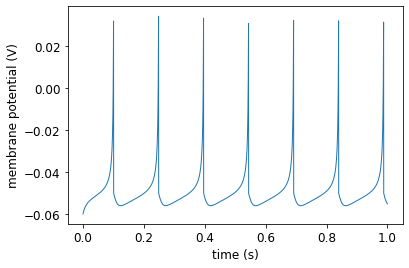

In [13]:
# Load the data from the file and plot the graph for the membrane potential
# using the pynml generate_plot utility function.
data_array = np.loadtxt("%s.v.dat" % simulation_id)
pynml.generate_plot(
    [data_array[:, 0]], [data_array[:, 1]],
    "Membrane potential", show_plot_already=False,
    xaxis="time (s)", yaxis="membrane potential (V)"
)